# STA 208: Homework 3 (Do not distribute)

## Due 05/23/2022 midnight (11:59pm)

__Instructions:__ 

1. Submit your homework using one file name ”LastName_FirstName_hw3.html” on canvas. 
2. The written portions can be either done in markdown and TeX in new cells or written by hand and scanned. Using TeX is strongly preferred. However, if you have scanned solutions for handwriting, you can submit a zip file. Please make sure your handwriting is clear and readable and your scanned files are displayed properly in your jupyter notebook. 
3. Your code should be readable; writing a piece of code should be compared to writing a page of a book. Adopt the one-statement-per-line rule. Consider splitting a lengthy statement into multiple lines to improve readability. (You will lose one point for each line that does not follow the one-statementper-line rule)
4. To help understand and maintain code, you should always add comments to explain your code. (homework with no comments will receive 0 points). For a very long comment, please break it into multiple lines.
5. In your Jupyter Notebook, put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text.
6. Please make sure to print out the necessary results to avoid losing points. We should not run your code to figure out your answers. 
7. However, also make sure we are able to open this notebook and run everything here by running the cells in sequence; in case that the TA wants to check the details.
8. You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions


### Exercise 1 (Probabilistic PCA and EM)

In Week 5-2, we learned the Probabilistic PCA model proposed by Tipping and Bishop (1999). 

Consider the model 
$$
x_i = \mu + \theta w_i + \sigma \varepsilon_i,
$$
where 
$\theta \in \mathbb{R}^{p \times r}$ is the loadings matrix (i.e., $\theta = VD$),
$w_i \overset{\text{i.i.d}}{\sim} N(0, I_r)$, and $\varepsilon_i \overset{\text{i.i.d}}{\sim} N(0, I_p)$.
For now, let's assume $\mu = 0_p$ for simplicity.

The likelihood function can be written as 
$$
\mathcal{L}(\theta, \sigma^2 | x_1, \dots, x_n) = \prod_{i=1}^n \int N(x_i | \theta w_i, \sigma^2 I_p) N(w_i | 0, I_r) dw_i,
$$
and it's log-likelihood function is given by 
$$
\ell(\theta, \sigma^2 | x_1, \dots, x_n) = \sum_{i=1}^n \log \int N(x_i | \theta w_i, \sigma^2 I_p) N(w_i | 0, I_r) dw_i.
$$
To derive the MLE, we will use the EM algorithm:



1. Derive the expectation-step (E-step) of the EM algorithm

__Solution__:

The log likelihood function is given by

\begin{align*}
\ell(\theta, \sigma^2 | x_1, \dots, x_n) &= \sum_{i=1}^n \log \int N(x_i | \theta w_i, \sigma^2 I_p) N(w_i | 0, I_r) dw_i \\

&= \sum_{i=1}^n \log \int p(x_i, w_i) dw_i \\

&= \sum_{i=1}^n \log \int q(w_i) \frac{p(x_i, w_i)}{q(w_i)}  dw_i \\
&= \sum_{i=1}^n \log \mathbb{E}_{q(w_i)} \left[\frac{p(x_i, w_i)}{q(w_i)} \right] \\

& \geq \sum_{i=1}^n  \mathbb{E}_{q(w_i)} \left[ \log \left( \frac{p(x_i, w_i)}{q(w_i)} \right) \right] \text{ By Jensen's equality } \\

&= \sum_{i=1}^n \int q(w_i) (\log p(x_i, w_i) - \log q(w_i)) dw_i \\

& \text{We need a choice of } q(w_i) \text{ that will turn the quantity in the expectation as a constant, a good choice of that being } P(w_i \mid x_i) \\

&= \sum_{i=1}^n \int p(w_i \mid x_i) \log p(x_i, w_i) dw_i \\

&= \sum_{i=1}^n \mathbb{E}_{w_i \mid x_i} \log p(x_i, w_i)\\
\end{align*}

Now, we need to find the $p(w \mid x)$ which we can get by making it proportional to the likelihood function times the prior ie.

\begin{align*}
p(w\mid x) &\propto p(x \mid w) p(w) \\

&\propto exp\left( -\frac{1}{2}((x_i - \theta w_i)^\top (\sigma^2 I_p)^{-1} (x_i - \theta w_i) + w^\top w) \right) \\

& \sim N((\theta^\top \theta + \sigma^2 I_p)^{-1} \theta^\top x_i, \sigma^{-2}(\theta^\top \theta + \sigma^2 I_p)) \\
\end{align*}

Now using this fact, we can derive the E-step of the EM algorithm, which is given by

\begin{align*}
\mathbb{Q}(\theta^{old}, \theta) &= \mathbb{E}_{w_i \mid x_i} [\log p(x_i, w_i)] \\
 &= - \sum_{i=1} ^ {n} \frac{p}{2}\log(2\pi\sigma^2) + \frac{1}{2} tr(E[w_i w_i^\top]) + \frac{1}{2\sigma^2}||x_i||^2_2 - \frac{1}{\sigma^2} \mathbb{E}[w_i]^\top \theta^\top x_i + \frac{1}{2\sigma^2} tr(\mathbb{E}[w_iw_i^\top] \theta^\top \theta)\\
\end{align*}

2. Obtain the expressions of $\hat \theta$ and $\hat \sigma^2$ from the maximization step (M-step) 

__Solution__:

To find, $\hat \theta$ \& $\hat \sigma^2$, we need to maximize the equation (1) obtained in the E-step ie:

\begin{align*}

\theta^{new} &= \arg \max_{\theta} \mathbb{Q}(\theta^{old}, \theta) \text{ and } \sigma^{2^{new}} = \arg \max_{\sigma^2} \mathbb{Q}(\sigma^{2^{old}}, \sigma^2)\\
\end{align*}

Lets find $\hat \theta$ using the above equation.

\begin{align*}
\theta^{new} &= \arg \max_{\theta} \mathbb{Q}(\theta^{old}, \theta) \\
&= \frac{\partial}{\partial \theta} \left(- \sum_{i=1} ^ {n} \frac{p}{2}\log(2\pi\sigma^2) + \frac{1}{2} tr(E[w_i w_i^\top]) + \frac{1}{2\sigma^2}||x_i||^2_2 - \frac{1}{\sigma^2} \mathbb{E}[w_i]^\top \theta^\top x_i + \frac{1}{2\sigma^2} tr(\mathbb{E}[w_iw_i^\top] \theta^\top \theta) \right) \\
&= -\sum_{i=1}^n -\frac{1}{\sigma^2} \mathbb{E}[w_i]^\top x_i + \frac{1}{\sigma^2} \theta \mathbb{E}[tr(w_i w_i^\top)] = 0\\
& \Rightarrow \sum_{i=1}^n \frac{1}{\sigma^2} \hat \theta \mathbb{E}[tr(w_i w_i^\top)] = \sum_{i=1}^n \frac{1}{\sigma^2} \mathbb{E}[w_i]^\top x_i \\
& \Rightarrow \hat \theta = \frac{\sum_{i=1}^n  \mathbb{E}[w_i]^\top x_i}{\sum_{i=1}^n  \mathbb{E}[tr(w_i w_i^\top)]} \\
\end{align*}

Now, for $\hat \sigma^2$, we need to maximize the equation (1) obtained in the E-step ie:

\begin{align*}
\sigma^{2^{new}} &= \arg \max_{\sigma^2} \mathbb{Q}(\sigma^{2^{old}}, \sigma^2) \\
&= \frac{\partial}{\partial \sigma^2} \left(- \sum_{i=1} ^ {n} \frac{p}{2}\log(2\pi\sigma^2) + \frac{1}{2} tr(E[w_i w_i^\top]) + \frac{1}{2\sigma^2}||x_i||^2_2 - \frac{1}{\sigma^2} \mathbb{E}[w_i]^\top \theta^\top x_i + \frac{1}{2\sigma^2} tr(\mathbb{E}[w_iw_i^\top] \theta^\top \theta) \right) \\

&= \sum_{i=1} ^ {n} \frac{p}{2\sigma^2} - \frac{1}{2(\sigma^2)^2}||x_i||^2_2 + \frac{1}{(\sigma^2)^2} \mathbb{E}[w_i]^\top \theta^\top x_i - \frac{1}{2(\sigma^2)^2} tr(\mathbb{E}[w_iw_i^\top] \theta^\top \theta) = 0 \\
& \Rightarrow \hat \sigma^2 = \frac{1}{pn} \sum_{i=1}^{n} ||x_i||^2_2 - 2 \mathbb{E}[w_i]^\top \theta^\top x_i + tr(\mathbb{E}[w_iw_i^\top] \theta^\top \theta) \\
\end{align*}

3. Describe how you implement the algorithm (e.g., you can write a sudo code). How can you make sure $\langle \theta_j, \theta_k \rangle = 0$ for any $j \neq k$ in each iteration? ($\theta_j$ is the $j$-th column of $\theta$)?

__Solution__:

To implement, we need to modularize the problem into 3 main parts:
1. Getting the E-step of the EM algorithm
    - With the parameters known and sampled, we can sample points from the formula we get as our $Q(\theta^{old}, \theta)$
    - Using the points obtained, they can be fed to the next step of the algorithm
2. Getting the M-step of the EM algorithm
    - Based on the formula we get the values of $\hat \theta$ and $\hat \sigma^2$ based on the formulas described above
    - The values of $\hat \theta$ and $\hat \sigma^2$ can be used to update the parameters of the model

3. EM algorithm
    - The algorithm is iterative, so we need to repeat the steps 1 and 2 until the convergence is reached
    - The convergence is reached when the difference between the parameters of the model at two consecutive iterations is less than a threshold


To make sure that the $\langle \theta_j, \theta_k \rangle = 0$ for any $j \neq k$ in each iteration, we need to sample the initials ones in a setting $n >> d$ and use the PCA scores to get the loadings using $\texttt{pca.transform}$ on the generated matrix.

### Exercise 2 (Gaussian mixture model and MCMC)

We have discussed how to estimate the Gaussian mixture model using EM in class. In this question, we explore the Bayesian finite Gaussian mixture model using MCMC. 

Recall the finite Gaussian mixture model with $K$ components:
$$
p(\boldsymbol x | \boldsymbol \pi, \boldsymbol \mu, \boldsymbol \sigma^2) = \prod_{i=1}^n \sum_{k=1}^K \pi_k N(x_i | \mu_k, \sigma_k^2),
$$
where $\boldsymbol x = (x_1, \dots, x_n)$, $\boldsymbol \pi = (\pi_1, \dots, \pi_K)$ is a vector of mixing proportions, $\boldsymbol \mu = (\mu_1, \dots, \mu_K)$ and $\boldsymbol \sigma^2 = (\sigma_1^2, \dots, \sigma_K^2)$ are means and variances of Gaussian densities (here, $\mu_k$ and $\sigma_k$ are scalars). 

In Bayesian setting, we introduce a latent variable $\boldsymbol z = (z_1, \dots, z_n)$, $z_j = k$, $k = 1, \dots, K$. Then, the model can be written as 

\begin{align}
& z_i | \boldsymbol \pi \sim \text{Multinomial}(\pi_1, \dots, \pi_K),\\
& x_i | z_i = k \sim N(x_i | \mu_k, \sigma^2_k).
\end{align}

We consider the following conjugate priors:

\begin{align}
& \boldsymbol \pi \sim \text{Dirichlet}(\alpha_1, \dots, \alpha_K),\\
& \mu_k|\sigma_k^2 \sim N(0, \rho_k \sigma_k^2),\\
& \sigma_k^{-2} \sim \text{Gamma}(a, b),
\end{align}

where $\alpha_1, \dots, \alpha_K, \rho_k, a, b$ are some hyperparamters which are fixed. Their values can be chosen by the user. For Dirichlet distribution, please check its density function [here](https://en.wikipedia.org/wiki/Dirichlet_distribution).

We will develop an MCMC algorithm for the model:

1. Derive the posterior distribution $p(z_i = k |\boldsymbol z_{-i}, \boldsymbol \pi, \boldsymbol \mu, \boldsymbol \sigma^2, \boldsymbol x)$ for each $i = 1, \dots, n$, where $\boldsymbol z_{-i} = (z_1, \dots, z_{i-1}, z_{i+1}, \dots, z_n)$ 
 

__Solution:__

For all the questions, $z_i$ indicates the $i$-th latent variable while $z_{\_i}$ indicates all elements except the $i^{th}$ element.

\begin{align*}
p(z_i = k \mid z_{\_i}, \pi, \mu, \sigma^2, x) &= \frac{p(x \mid z, \pi , \mu, \sigma^2) p(z_i \mid z_{\_i}, \pi , \mu, \sigma^2)}{p(x \mid z_{\_i}, \pi, \mu, \sigma^2)} \\

&= \frac{\pi_{z_i} N(x_i; \mu_{z_i}, \sigma^2_{z_i})}{\sum_{k=1}^{K}\pi_{z_k} N(x_k; \mu_{z_k}, \sigma^2_{z_k})}
\end{align*}


2. Derive the posterior distribution $p(\boldsymbol \pi | \boldsymbol x, \boldsymbol z)$ (hint: Dirichlet prior is conjugate with the multinomial distribution [see "Table of conjugate distributions"])(https://en.wikipedia.org/wiki/Conjugate_prior)


__Solution:__

\begin{align*}
p(\pi \mid x,z) &= \frac{p(x, z \mid \pi) p(\pi)}{p(x, z)} \\

&\propto p(x,z \mid \pi) p(\pi) \\
&\propto p(x \mid z, \pi) p(z \mid \pi) p(\pi) \\
&= \prod_{i=1}^{n} N(x_i \mid \mu_{z_i}, \sigma^2_{z_i}) \prod_{i=1}^{n} \pi_{z_i} \prod_{k=1}^{K} \pi_k^{\alpha_k - 1}\\
& \text{ We can consider only the terms dependent on } \pi \text{ hence, we drop the term } \prod_{i=1}^{n} N(x_i \mid \mu_{z_i}) \\
&= \prod_{i=1}^{n} \pi_{z_i} \prod_{k=1}^{K} \pi_k^{\alpha_k - 1} \\
& \text{ We can change the product from i in } 1 \dots n \text{ to k in } 1 \dots K \text{ by raising } \pi_{z_i} \text { to } \bm{1}^{(i = k)} = n_k \text{ which represent number of times i = k} \\
&= \prod_{k=1}^{K} \pi_k^{n_k + \alpha_k - 1} \sim Dirchlet(\alpha_1 + n_1 - 1, \dots , \alpha_k + n_k - 1) \\
\end{align*}

3. Derive the posterior distribution $p(\sigma_k^{-2} | \boldsymbol x, \mu_k, \boldsymbol z)$
for each $k = 1, \dots, K$


__Solution:__

We know that the posterior distribution is proportional to the prior distribution times the likelihood. Using that fact, we can derive the posterior distribution of $\sigma^{-2}_k$:

\begin{align*}
p(\sigma^{-2}_{k} \mid x, \mu_k, z)  &\propto P(x, \mu_k, z \mid \sigma^{-2}_{k}) P(\sigma^{-2}_{k}) \\

& \text{ If we drop all the normalizing constants and terms not dependent on } \sigma^{-2} \text{ we get the simplified form below} \\

& \propto \frac{1}{\sigma^{2n/2}}(\sigma^{-2}_k)^{a-1} exp(-b\sigma^{-2}_k - \frac{\sigma^{-2}_k}{2} \sum_{i=1}^{n} (x_i - \mu_k)^2) \\
& \propto (\sigma^{-2})^{n/2}(\sigma^{-2}_k)^{a-1} exp(-\sigma^{-2}_k (b + \frac{1}{2} \sum_{i=1}^{n} (x_i - \mu_k)^2)) \sim Gamma (a + \frac{n}{2}, b + \frac{1}{2} \sum_{i=1}^{n} (x_i - \mu_k)^2) \\
\end{align*}


4. Derive the posterior distribution $p(\mu_k | \boldsymbol x, \boldsymbol z, \sigma_k^{2})$ for each $k = 1, \dots, K$


__Solution:__

Given the prior distribution of $\mu_k$, we can derive the posterior distribution of $\mu_k$ from the likelihood times the prior:

\begin{align*}
p(\mu_k \mid x, z, \sigma_k^{2}) &\propto p(x \mid z, \mu_k, \sigma_k^{2}) p(\mu_k) \\
& \text{If we drop all the normalizing constants and terms not dependent on } \mu_k \text{ we get the simplified form below} \\
& \propto  exp \left(-\frac{1}{2} \frac{\mu_k^2}{\rho_k \sigma_k^2} + \frac{\sum_{i=1}^{n}(x_i - \mu_k)^2}{\sigma^2_k} \right) \\
& \propto  exp\left( -\frac{1}{2}\frac{\mu_k^2}{\rho_k \sigma_k^2} + \frac{\rho_k\sum_{i=1}^{n}(x_i - \mu_k)^2}{\rho_k \sigma^2_k}\right) \\
& \propto  exp \left(-\frac{1}{2} \frac{\mu_k^2 + \rho_k \sum_{i=1}^{n}(x_i^2 -2\mu_k x_i + \mu_k^2)}{\rho_k \sigma^2_k}\right) \\
& \propto  exp \left(-\frac{1}{2} \frac{\mu_k^2 + n\rho_k \mu_k^2 - 2\mu_k n\bar{x} + \rho_k \sum_{i=1}^{n}(x_i^2)}{\rho_k \sigma^2_k}\right) \\
& \text{Ignoring the term } \rho_k \sum_{i=1}^{n}(x_i^2)  \text{ since it is a constant, we get} \\
& \propto  exp \left(-\frac{1}{2} \frac{\mu_k^2(1+n\rho_k) - 2\mu_k n \rho_k \bar{x}}{\rho_k\sigma^2_k}\right) \\
& \propto exp \left(-\frac{1}{2} \frac{\mu_k^2 - 2\mu_k \frac{n \rho_k \bar{x}}{(1 + n\rho_k)}}{\frac{\rho_k \sigma^2_k}{(1 + n\rho_k)}}\right) \\
& \text{ The numerator is of the format } a^2 - 2ab = (a+b)^2 - b^2 \text{ , Using this we get}\\
& \propto exp \left(-\frac{1}{2} \frac{\left(\mu_k - \frac{n \rho_k \bar{x}}{(1 + n\rho_k)}\right)^2 - (\frac{n \rho_k \bar{x}}{(1 + n\rho_k)})^2}{\frac{\rho_k \sigma^2_k}{(1 + n\rho_k)}}\right) \\
& \text {Ignoring the term } \left(\frac{n \rho_k \bar{x}}{(1 + n\rho_k)}\right)^2 \text{ since it doesnt depend on } \mu \text{ we get} \\
& \propto exp \left(-\frac{1}{2} \frac{\left(\mu_k - \frac{n \rho_k \bar{x}}{(1 + n\rho_k)}\right)^2}{\frac{\sigma^2_k}{(1 + n\rho_k)}}\right) \sim N \left(\frac{n \rho_k \bar{x}}{(1 + n\rho_k)}, \frac{\rho_k \sigma^2_k}{(1 + n\rho_k)}\right) \\

\end{align*}


5. Write a function, call it ``MCMCGaussianFiniteMixture``, for the MCMC algorithm (choose $K = 3$).

The structure of your function could look like this:

      MCMCGaussianFiniteMixture(x, T = 5000, K = 3, put those hyperparameters here)
            
       # Note: T is the total iterations, K is the number of mixture components     
       {
            
            Step 1: choose initial values for parameters to start the algorithm
         
            Step 2: for t = 1, ..., T (total iteration) # start MCMC iterations
            
                Step 2.1 draw z_1, ..., z_n 
             
                Step 2.2 draw \pi_1, ..., \pi_K 
            
                Step 2.3: for k = 1, ... K:
                
                    Step 2.3.1 draw \sigma_k^{-2} (or \sigma_k^2) 
                
                    Step 2.3.2 draw \mu_k 
                
                End the for loop
             
            Collect values 
             
            End the for loop
                
            Output: sample draws of mu, sigma, pi
      }
To obtain draws from the Dirichlet distribution, use the function [`np.random.dirichlet`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html)



__Solution:__

In [60]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal,norm, invgamma
from scipy.special import logsumexp

In [61]:
def get_z_val(X,pi, mu, sigma):
    """
    Function to generate posterior distribution of z

    Args:
        X (np.array): Data
        pi (np.array): Mixture probabilities
        mu (np.array): Means of Gaussian distributions
        sigma (np.array): Variances of Gaussian distributions

    Returns:
        np.array: Posterior distribution of z
    """
    
    # Initialzing number of rows and clusters
    k = len(pi)
    n = len(X)
    
    # Initialzing posterior distribution of z
    ll = np.zeros(shape = (n,k))
    
    # Generating value of P(z_i=k|x_i)
    for j in range(k):
        ll[:,j] = pi[j]*norm(mu[j],sigma[j]).pdf(X)
    
    # Denominator of P(z_i=k|x_i)
    row_sums = np.sum(ll, axis = 1)
    
    # Divide each row by the denominator to get the probability
    for i in range(n):
        ll[i,:] = ll[i,:]/row_sums[i]
    
    # INitialize Z
    z = []
    
    # Select class where probability is maximum
    for i in range(n):
        z.append(np.argmax(ll[i,:]))
    z = np.array(z)
    
    # Return the value
    return z

In [62]:
def get_pi(z, alpha):
    """
    Generate the posterior of mixture probabilities

    Args:
        z (np.array): Latent variable
        alpha (np.array): Hyperparameter

    Returns:
        np.aray: Posterior of mixture probabilities
    """
    
    # Counting the number of each class
    freq = np.array([np.sum(z == i) for i in range(len(alpha))])
    
    # Sampling pi from a Dirichlet distribution
    pi = np.random.dirichlet(alpha+freq, size = 1)[0]
    
    # Return the value
    return pi


In [133]:
def get_sigma(X,mu,z,a,b):
    """
    Summary:
    Posterior of variance

    Args:
        X (np.array): Data
        mu (np.array): Means of Gaussian distributions
        z (np.array): Latent variable
        a (int): Hyperparameter
        b (int): Hyperparameter

    Returns:
        np.array: Posterior of variance
    """
    
    # Initialzing number of rows and clusters
    cluster_size = mu.shape[0]
    n = X.shape[0]
    
    # Initialzing posterior of variance
    sigma = np.zeros((cluster_size,))
    
    # Parsing through each cluster
    for cluster in range(cluster_size):
        
        # Calculating the vraiance for cluster
        variance = np.sum((X[z == cluster]-mu[cluster]) ** 2)
        
        # Sample from a Gamma distribution
        sigma[cluster] = np.random.gamma(a + n/2, 1/(b + 0.5 * variance))
    
    # Since gamma is the distribution of sigma^-2, we can return inverse of variance to get sigma^2
    return 1/sigma

In [132]:
def get_mu(X,z,rho,sigma):
    """
    Summary:
    Posterior of mean
    
    Args:
        X (np.array): Data
        z (np.array): Latent variable
        rho (np.array): Hyperparameter
        sigma (np.array): Posterior of variance

    Returns:
        np.array: Posterior of mean
    """
    
    # Initialzing number of rows and clusters
    cluster_size = sigma.shape[0]
    n = X.shape[0]
    
    # Initialzing posterior of mean
    mu = np.zeros((cluster_size,))
    

       
    # Parsing through each cluster
    for cluster in range(cluster_size):
        # Calculating the mean for cluster
        mean = np.sum(X[z == cluster]) * rho[cluster] / (1 + n * rho[cluster])
        #Calculating the variance for cluster
        var = rho[cluster] * sigma[cluster]/(1 + n * rho[cluster])
        # Sample from a Gaussian distribution
        mu[cluster] = np.random.normal(mean, var)
    
    # Return the value
    return mu

In [155]:
def MCMCGaussianFiniteMixture(X,k,true_zs,iterations = 5000,alpha = np.ones(3),a = 2,b = 2,rho = np.ones(3)):
    
    # Initializing the parameters
    pi = np.random.dirichlet((1,1,1),1)[0]
    mu = np.array([np.random.normal(3) for _ in range(k)])
    sigma = np.array([np.random.gamma(1,1) for _ in range(k)])
    
    
    z_new = []
    pi_new = []
    mu_new = []
    sigma_new = []
    
    
    for i in range(iterations):
        
        # Generating z
        if len(true_z_s):
            z = true_z_s
        else:
            z = get_z_val(X,pi,mu,sigma)
        
        # Generating pi
        pi = get_pi(z, alpha)
        
        # Generating mu
        sigma = get_sigma(X,mu ,z,a,b)
        
        # Generating mu
        mu = get_mu(X,z,rho,sigma)
        
        # Storing the values
        z_new.append(z)
        pi_new.append(pi)
        mu_new.append(mu)
        sigma_new.append(sigma)
    
    # Returning the values
    return pi_new, mu_new, sigma_new, z_new

6. Fit the ``mouse.csv`` data with the function ``MCMCGaussianFiniteMixture`` you wrote (choose $K = 3$, set the total iteration to be $5,000$ or larger. For those hyperparameters, you can choose $\alpha_1, \dots, \alpha_K = 1, \rho_k = 1$, $a = 2, b = 2$; other values are possible as well), 
    - a) plot the MCMC chains for $\pi_k$, $\mu_k$ and $\sigma_k$ for all $k = 1, \dots, K = 3$ (the title of each plot should include the corresponding variable name)
    
__Solution:__

In [156]:
# Data generation code from Piazza note @ 106
N = 100 # sample size
true_z_s = []
u = np.random.uniform(0, 1, N) #Sample N random uniforms u from [0, 1]
data = [] # create an empty array
for i in range(N):
    if u[i] <= 0.3:
        data = np.append(data, np.random.normal(-1.5, 0.5, 1))
        true_z_s.append(0)
    elif 0.3 < u[i] <= 0.8:
        data = np.append(data, np.random.normal(0, 1, 1))
        true_z_s.append(1)
    else:
        data = np.append(data, np.random.normal(3, 2, 1))
        true_z_s.append(2)
        
true_z_s = np.array(true_z_s)

In [157]:
# Calling MCMC function on the generated data
pi,mu,sigma,z = MCMCGaussianFiniteMixture(data,3, true_z_s, iterations = 1000)

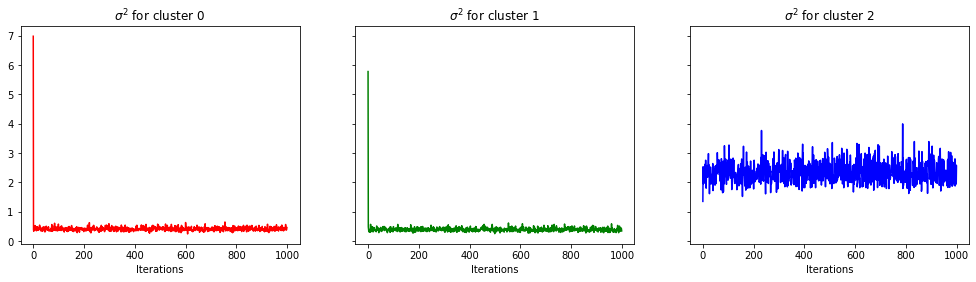

In [158]:
# Plotting the data for every cluter
sigma = np.array(sigma)
fig,axes = plt.subplots(1,3, sharex= True, sharey = True, figsize = (17,4))
colors = ['red','green','blue']
for i in range(3):
    axes[i].plot(sigma[:,i], color = colors[i])
    axes[i].set_title('$\sigma^2$ for cluster {}'.format(i))
    axes[i].set_xlabel('Iterations')


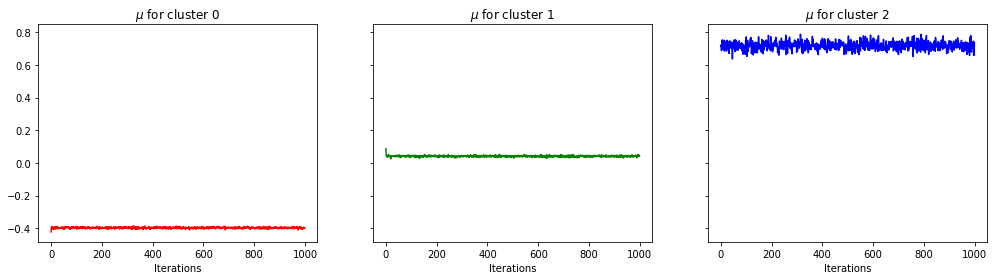

In [159]:
# Plotting the data for every cluter
mu = np.array(mu)
fig,axes = plt.subplots(1,3, sharex= True, sharey = True, figsize = (17,4))
colors = ['red','green','blue']
for i in range(3):
    axes[i].plot(mu[:,i], color = colors[i])
    axes[i].set_title('$\mu$ for cluster {}'.format(i))
    axes[i].set_xlabel('Iterations')

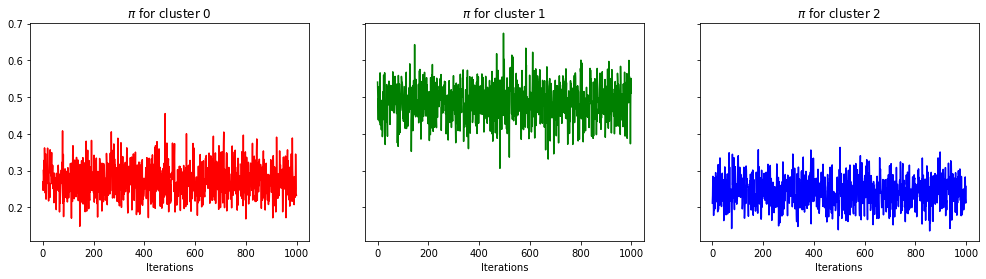

In [160]:
# Plotting the data for every cluter
pi = np.array(pi)
fig,axes = plt.subplots(1,3, sharex= True, sharey = True, figsize = (17,4))
colors = ['red','green','blue']
for i in range(3):
    axes[i].plot(pi[:,i], color = colors[i])
    axes[i].set_title('$\pi$ for cluster {}'.format(i))
    axes[i].set_xlabel('Iterations')

- b) how many draws would you consider as burnin?
   
__Solution:__

Based on the above graphs, a good estimate for the burnin would be roughly $25$ iterations.

 - c) plot the ACF (autocorrelation) function for each chain after removing the burnin. 
 
__Solution:__

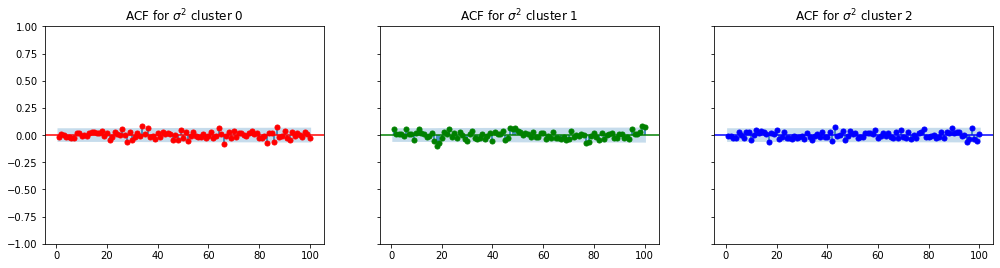

In [161]:
# Importing libraries required to plot the acf
from statsmodels.graphics.tsaplots import plot_acf

colors = ['red','green','blue']
fig,axes = plt.subplots(1,3, sharex= True, sharey = True, figsize = (17,4))

# Remove the burnin
new_sigma = sigma[25:]

# Plotting the acf for every cluster
for k in range(3):
    plot_acf(new_sigma[:, k], lags = 100, alpha = 0.05, zero = False, ax = axes[k], color = colors[k])
    axes[k].set_title('ACF for $\sigma^2$ cluster {}'.format(k))

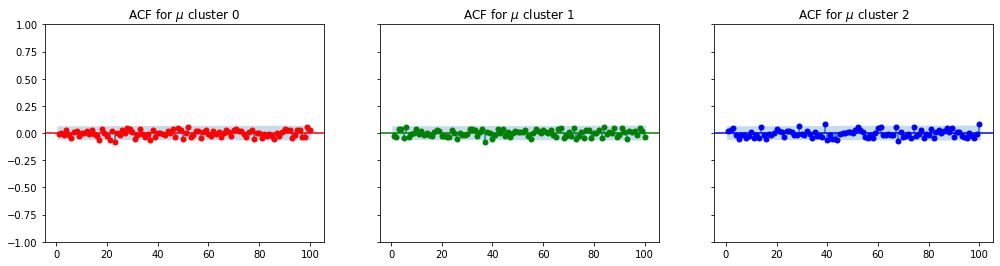

In [142]:
fig,axes = plt.subplots(1,3, sharex= True, sharey = True, figsize = (17,4))

# Remove the burnin
new_mu = mu[25:]

# Plotting the acf for every cluster
for k in range(3):
    plot_acf(new_mu[:, k], lags = 100, alpha = 0.05, zero = False, ax = axes[k], color = colors[k])
    axes[k].set_title('ACF for $\mu$ cluster {}'.format(k))

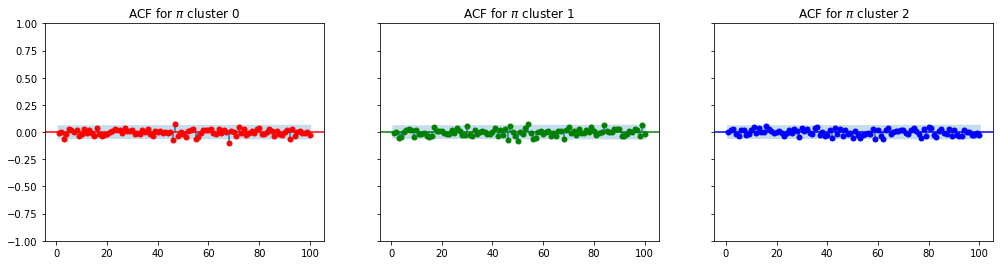

In [162]:
fig,axes = plt.subplots(1,3, sharex= True, sharey = True, figsize = (17,4))

# Plotting the acf for every cluster
new_pi = pi[25:]

# Plotting the acf for every cluster
for k in range(3):
    plot_acf(new_pi[:, k], lags = 100, alpha = 0.05, zero = False, ax = axes[k], color = colors[k])
    axes[k].set_title('ACF for $\pi$ cluster {}'.format(k))

- d) remove those draws you considered as burnin, and obtain the posterior means and 95\% credible intervals for each quantity. Compare those values with the MLE obtained using EM (i.e., fit the data using the [``GaussianMixture``](`https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) package). Comment on your findings (e.g., are those values from EM close to their posterior means? Do the 95\% credible intervals include those values from EM?)
   

In [163]:
# IMporting libraries required for Gaussian Mixture Model
import statsmodels.stats.api as sms
import scipy.stats as st
from texttable import Texttable
from sklearn.mixture import GaussianMixture

# Initializing the values to store posterior means and credible intervals
mu_mean_ci = [0] * 3
mu_mean = [0] * 3

pi_mean_ci = [0] * 3
pi_mean = [0] * 3

sigma_mean_ci = [0] * 3
sigma_mean = [0] * 3

# Parsing through every cluster
for k in range(3):
    # Getting the posterior mean and credible interval
    mu_mean_ci[k] = (np.quantile(new_mu[:,k], 0.025), np.quantile(new_mu[:,k], 0.975))
    mu_mean[k] = np.mean(new_mu[:,k])
    
    # Getting the posterior mean and credible interval
    pi_mean_ci[k] = (np.quantile(new_pi[:,k], 0.025), np.quantile(new_pi[:,k], 0.975))
    pi_mean[k] = np.mean(new_pi[:,k])
    
    # Getting the posterior mean and credible interval
    sigma_mean_ci[k] = (np.quantile(new_sigma[:,k], 0.025), np.quantile(new_sigma[:,k], 0.975))
    sigma_mean[k] = np.mean(new_sigma[:,k])
    

In [164]:
def pretty_print(means,cis):
    """
    Summary:
    Helper function to print the posterior means and credible intervals

    Args:
        means (np.array): posterior means
        cis (np.array): credible intervals
    """
    
    # Initializing the table
    table = Texttable()
    
    # Setting the table header
    table.header(['Cluster', 'Mean', '95% CI'])
    for i in range(3):
        # Appending the data to the table
        table.add_row([i, means[i], cis[i]])
    
    # Printing the table
    print(table.draw())    

In [165]:
pretty_print(mu_mean, mu_mean_ci)

+---------+--------+---------------------------------------------+
| Cluster |  Mean  |                   95% CI                    |
+=========+========+=============================================+
| 0       | -0.453 | (-0.46169034937021314, -0.4438404724866678) |
+---------+--------+---------------------------------------------+
| 1       | 0.053  | (0.03976638858149205, 0.06568435883733754)  |
+---------+--------+---------------------------------------------+
| 2       | 0.350  | (0.3190735659245513, 0.37878577583193684)   |
+---------+--------+---------------------------------------------+


In [166]:
pretty_print(pi_mean, pi_mean_ci)

+---------+-------+-------------------------------------------+
| Cluster | Mean  |                  95% CI                   |
+=========+=======+===========================================+
| 0       | 0.273 | (0.1921861006758719, 0.36717601205412176) |
+---------+-------+-------------------------------------------+
| 1       | 0.485 | (0.38597118430035804, 0.5765259724192273) |
+---------+-------+-------------------------------------------+
| 2       | 0.242 | (0.1660230228485131, 0.3194916613024509)  |
+---------+-------+-------------------------------------------+


In [167]:
pretty_print(sigma_mean, sigma_mean_ci)

+---------+-------+-------------------------------------------+
| Cluster | Mean  |                  95% CI                   |
+=========+=======+===========================================+
| 0       | 0.413 | (0.3154237990715024, 0.5431613949220377)  |
+---------+-------+-------------------------------------------+
| 1       | 0.393 | (0.29752368117386224, 0.5184733807573005) |
+---------+-------+-------------------------------------------+
| 2       | 2.337 | (1.7784070124092168, 3.0644549006624544)  |
+---------+-------+-------------------------------------------+


In [80]:
# Fitting the Gaussian Mixture Model from scikit-learn
gm = GaussianMixture(n_components = 3, random_state= 42).fit(data.reshape(-1,1))

In [81]:
# Getting the means from the GMM
gm.means_

array([[ 0.41478748],
       [-1.56579413],
       [ 5.08645817]])

In [82]:
# Getting the posterior probabilities from the GMM
probs = gm.predict_proba(data.reshape(-1,1))

# For cluster 0
print("pi for cluster 0:", np.mean(probs[:,0]))

# For cluster 1
print("pi for cluster 1:", np.mean(probs[:,1]))

# For cluster 2
print("pi for cluster 2:", np.mean(probs[:,2]))

pi for cluster 0: 0.5855134593866432
pi for cluster 1: 0.358957496916193
pi for cluster 2: 0.05552904369716385


Based on the values and the observed CI's, we see that most of the parameters obtained in the MLE step are not in the obtained credible intervals from the MCMC step. However the probabilities of the mixture components are close to the MLE values.

 - e) (bonus point: 2 points) Using the MCMC draws you obtained to classify the mouse data (i.e., predict the mouse data and determine the label each data point belongs to). Plot the mouse data with the predicted labels using ``red`` color for Left Ear, ``green`` color for Right Ear, and ``blue`` for Head. Compare the plot with the one from EM (you can find the plot in the Week 5-2's lecture notes)

Note: ``BayesianGaussianMixture`` in sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture) does not use the MCMC algorithm. It uses the so-called _variational Bayes method_, which has not been discussed yet.

### Exercise 3 (Kernel density estimation)

_If you do not have time to complete this question, you can submit your solution with hw4. You will not lose any penalty points if you choose to do so._

The data set ``n90_pol.csv`` contains information on 90 British university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views.

The variables ``amygdala`` and ``acc`` indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar anatomical variables. The variable ``orientation`` gives the subjects’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal). orientation is an ordinal but not a metric variable, so scores of 1 and 2 are not necessarily as far apart as scores of 2 and 3.

1. Estimate the probability density for the volume of the amygdala. Plot it and report the bandwidth. Repeat this for the volume of the ACC.
2. Estimate a joint probability density for the volumes of the amygdala and the ACC. What are the bandwidths? Are they the same as the bandwidths you got in problem 1? Should they be?
3. Plot the joint density. Does it suggest the two volumes are statistically independent? Should they be? You may use three dimensions, color, contours, etc., for your plot, but you will be graded, in part, on how easy to read it is. (Hint: Remember that the random variables $X$ and $Y$ are statistically independent when their joint pdf is the product of their marginal pdfs, $p(x, y) = p(x)p(y)$. Think about what the product of your estimated pdfs from question 1 would look like.